In [1]:
# In this project, we are going to predict the chances of rain for the next day based on various parameters from the data.
# We are taking the dataset weatherAUS.csv for our prediction analysis. The data is collected from various cities in Australia.

# Data Loading

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset weatherAUS.csv using Pandas library

rain_prediction_data = pd.read_csv("weatherAUS//weatherAUS.csv")
rain_prediction_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# Data Preprocessing and Exploratory Data Analysis

In [4]:
# Checking the information of the dataset

rain_prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Checking the shape of our dataset
# Our dataset has 145460 instances of data regarding the weather changes and related parameters on a daily basis from year 2008

rain_prediction_data.shape

(145460, 23)

In [6]:
# Looking at the numerical information in the dataset using the describe function

rain_prediction_data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [7]:
# We are now looking at the numerical columns present in our data

rain_prediction_data.describe().columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [8]:
# We have 16 numerical columns in our data out of total 23 columns
# That tells us that we have 7 columns with textual data

len(rain_prediction_data.describe().columns)

16

In [9]:
# We can see that the data in the Date column is string type

type(rain_prediction_data.Date[1])

str

In [10]:
# Now we will look at the NULL values present in our data

rain_prediction_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Dealing with Missing values

In [11]:
# From the above data of null values, we can see that almost al the columns of our data have null values present in them.
# Only the Date and Location columns have No NULL values.

In [12]:
# We can also notice that columns like "Evaporation", "Sunshine", "Cloud9am" and "Cloud3pm" have nearly half the data as Null.
# We can drop those columns from our data for further analysis.
# Imputation of missing data is not possible for those columns as NULL values are dominating them.

In [13]:
# Dropping the columns "Evaporation", "Sunshine", "Cloud9am" and "Cloud3pm" from our dataset

rain_prediction_data.drop(columns = ["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)

In [14]:
# Checking the dataset now to see if the changes worked or not

rain_prediction_data.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No           No  
1       1010.6       1007.8     17.2     24.3        No           No  
2       1007.6       1008.7     21.0     23.2        No           No  
3       1017.6       1012.8     18.1     26.5        No           No  
4       1010.8       1006.0     17.8     29.7        No           No

In [15]:
# We can see that now the columns of our dataset are changed from 23 to 19 now after dropping 4 columns.

len(rain_prediction_data.columns)

19

In [16]:
# Now we cann't see the columns that were dropped from our dataset

rain_prediction_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [33]:
rain_prediction_data.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No             0  
1       1010.6       1007.8     17.2     24.3        No             0  
2       1007.6       1008.7     21.0     23.2        No             0  
3       1017.6       1012.8     18.1     26.5        No             0  
4       1010.8       1006.0     17.8     29.7        No             0

In [20]:
# We will look into the output label column "RainTomorrow" 

rain_prediction_data.RainTomorrow

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object

In [21]:
# We can see that the output label column is string type from the code below

type(rain_prediction_data.RainTomorrow[0])

str

In [22]:
# Checking the types of output labels we have in out data

rain_prediction_data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [23]:
# We have only 2 labels from the output data. "Yes" or "No"

In [24]:
# Checking the NULL values in the output label column

rain_prediction_data["RainTomorrow"].isnull().sum()

3267

In [25]:
# We will drop the instances with output label column as NULL for further analysis

rain_prediction_data.dropna(subset=["RainTomorrow"],inplace=True)

In [26]:
rain_prediction_data["RainTomorrow"].isnull().sum()

0

In [27]:
# We will now convert the output label column "RainTomorrow" into numerical column like "Yes" --- 1 and "No" --- 0

# rain_prediction_data["RainTomorrow"].replace(["Yes","No"],[1,0],inplace=True)

# rain_prediction_data.head()

In [28]:
type(rain_prediction_data.RainTomorrow[0])

str

In [29]:
# Checking the Missing values in our dataset

rain_prediction_data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [30]:
# Converting the output label column into binary column for further analysis

rain_prediction_data["RainTomorrow"].replace(["Yes","No"],[1,0],inplace=True)
rain_prediction_data.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  RainTomorrow  
0       1007.7       1007.1     16.9     21.8        No             0  
1       1010.6       1007.8     17.2     24.3        No             0  
2       1007.6       1008.7     21.0     23.2        No             0  
3       1017.6       1012.8     18.1     26.5        No             0  
4       1010.8       1006.0     17.8     29.7        No             0

In [40]:
# We will drop the instances with RainToday column as NULL for further analysis

rain_prediction_data.dropna(subset=["RainToday"],inplace=True)

In [41]:
rain_prediction_data.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [42]:
# Converting the RainToday column into binary column for further analysis

rain_prediction_data["RainToday"].replace(["Yes","No"],[1,0],inplace=True)
rain_prediction_data.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0       1007.7       1007.1     16.9     21.8          0             0  
1       1010.6       1007.8     17.2     24.3          0             0  
2       1007.6       1008.7     21.0     23.2          0             0  
3       1017.6       1012.8     18.1     26.5          0             0  
4       1010.8       1006.0     17.8     29.7          0             0

In [49]:
# We have a total of 140787 instances in our data and 19 columns

rain_prediction_data.shape

(140787, 19)

In [50]:
# Now we still have many Null values in our data
# We are going to drop the null values in our data using dropna() function

rain_prediction_data.dropna(inplace=True)
rain_prediction_data.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0       1007.7       1007.1     16.9     21.8          0             0  
1       1010.6       1007.8     17.2     24.3          0             0  
2       1007.6       1008.7     21.0     23.2          0             0  
3       1017.6       1012.8     18.1     26.5          0             0  
4       1010.8       1006.0     17.8     29.7          0             0

In [52]:
# Now after dropping the Null values in our data, we have a total of 112925 instances

rain_prediction_data.shape

(112925, 19)

In [54]:
# From the isnull().sum() methods, we can see that there are no Null values in our data

rain_prediction_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Visualization of data

0    87906
1    25019
Name: RainTomorrow, dtype: int64




<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

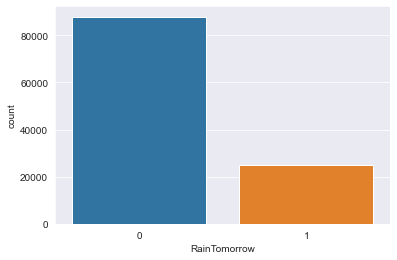

In [158]:
# Wecan see that there are more days of No rain than the days of Rain in our data from the value_counts method

print(rain_prediction_data["RainTomorrow"].value_counts())
print("\n")

# We are using seaborn's countplot to figure out the data of Rain or No rain output label

sns.set_style("darkgrid")
sns.countplot(x = "RainTomorrow",data = rain_prediction_data)

In [55]:
# Now we are creating a correlation matrix using the corr() function or method to get the correlation data

correlation_data = rain_prediction_data.corr()
correlation_data

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.728942  0.103807       0.159176      0.150577   
MaxTemp        0.728942  1.000000 -0.076825       0.056742     -0.006114   
Rainfall       0.103807 -0.076825  1.000000       0.130388      0.085376   
WindGustSpeed  0.159176  0.056742  0.130388       1.000000      0.589735   
WindSpeed9am   0.150577 -0.006114  0.085376       0.589735      1.000000   
WindSpeed3pm   0.146078  0.013976  0.060288       0.679223      0.499372   
Humidity9am   -0.218312 -0.517188  0.238756      -0.183729     -0.221500   
Humidity3pm    0.026733 -0.497679  0.259652      -0.020903     -0.017875   
Pressure9am   -0.433645 -0.312597 -0.167595      -0.445046     -0.201550   
Pressure3pm   -0.448298 -0.411360 -0.126520      -0.399751     -0.150433   
Temp9am        0.898785  0.884925  0.007418       0.124733      0.089493   
Temp3pm        0.704477  0.984357 -0.080376       0.018325     -0.019280   
RainToday      0.044605 -0.242983  0.497554       0.154943      0.099773   
RainTomorrow   0.078691 -0.168872  0.238379       0.238664      0.093173   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.146078    -0.218312     0.026733    -0.433645   
MaxTemp            0.013976    -0.517188    -0.497679    -0.312597   
Rainfall           0.060288     0.238756     0.259652    -0.167595   
WindGustSpeed      0.679223    -0.183729    -0.020903    -0.445046   
WindSpeed9am       0.499372    -0.221500    -0.017875    -0.201550   
WindSpeed3pm       1.000000    -0.093364     0.053916    -0.284036   
Humidity9am       -0.093364     1.000000     0.684373     0.115345   
Humidity3pm        0.053916     0.684373     1.000000    -0.035468   
Pressure9am       -0.284036     0.115345    -0.035468     1.000000   
Pressure3pm       -0.244390     0.168052     0.046073     0.960248   
Temp9am            0.126778    -0.464487    -0.202107    -0.400133   
Temp3pm           -0.011471    -0.510028    -0.547120    -0.270662   
RainToday          0.087702     0.378306     0.386619    -0.188677   
RainTomorrow       0.096277     0.276704     0.455945    -0.243702   

               Pressure3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  
MinTemp          -0.448298  0.898785  0.704477   0.044605      0.078691  
MaxTemp          -0.411360  0.884925  0.984357  -0.242983     -0.168872  
Rainfall         -0.126520  0.007418 -0.080376   0.497554      0.238379  
WindGustSpeed    -0.399751  0.124733  0.018325   0.154943      0.238664  
WindSpeed9am     -0.150433  0.089493 -0.019280   0.099773      0.093173  
WindSpeed3pm     -0.244390  0.126778 -0.011471   0.087702      0.096277  
Humidity9am       0.168052 -0.464487 -0.510028   0.378306      0.276704  
Humidity3pm       0.046073 -0.202107 -0.547120   0.386619      0.455945  
Pressure9am       0.960248 -0.400133 -0.270662  -0.188677     -0.243702  
Pressure3pm       1.000000 -0.453075 -0.378574  -0.104902     -0.224142  
Temp9am          -0.453075  1.000000  0.859910  -0.113986     -0.035385  
Temp3pm          -0.378574  0.859910  1.000000  -0.248650     -0.203525  
RainToday        -0.104902 -0.113986 -0.248650   1.000000      0.315359  
RainTomorrow     -0.224142 -0.035385 -0.203525   0.315359      1.000000

<AxesSubplot:>

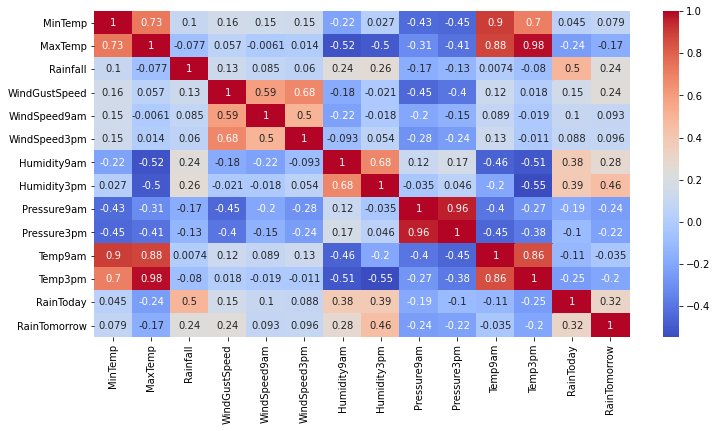

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation_data,annot=True,cmap="coolwarm")

In [45]:
# We can see from the above heatmap that the correlation between RainToday and RainTomorrow is 0.32
# This indicates that there are 32 % probability or chance of Raining Tomorrow if there is Rain Today.

#### We can also see that the paramaters like MinTemp, WindSpeed9am, WindSpeed3pm, Temp9am columns are very very less correlated to our RainTomorrow column.

In [46]:
rain_prediction_data.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0       1007.7       1007.1     16.9     21.8          0             0  
1       1010.6       1007.8     17.2     24.3          0             0  
2       1007.6       1008.7     21.0     23.2          0             0  
3       1017.6       1012.8     18.1     26.5          0             0  
4       1010.8       1006.0     17.8     29.7          0             0

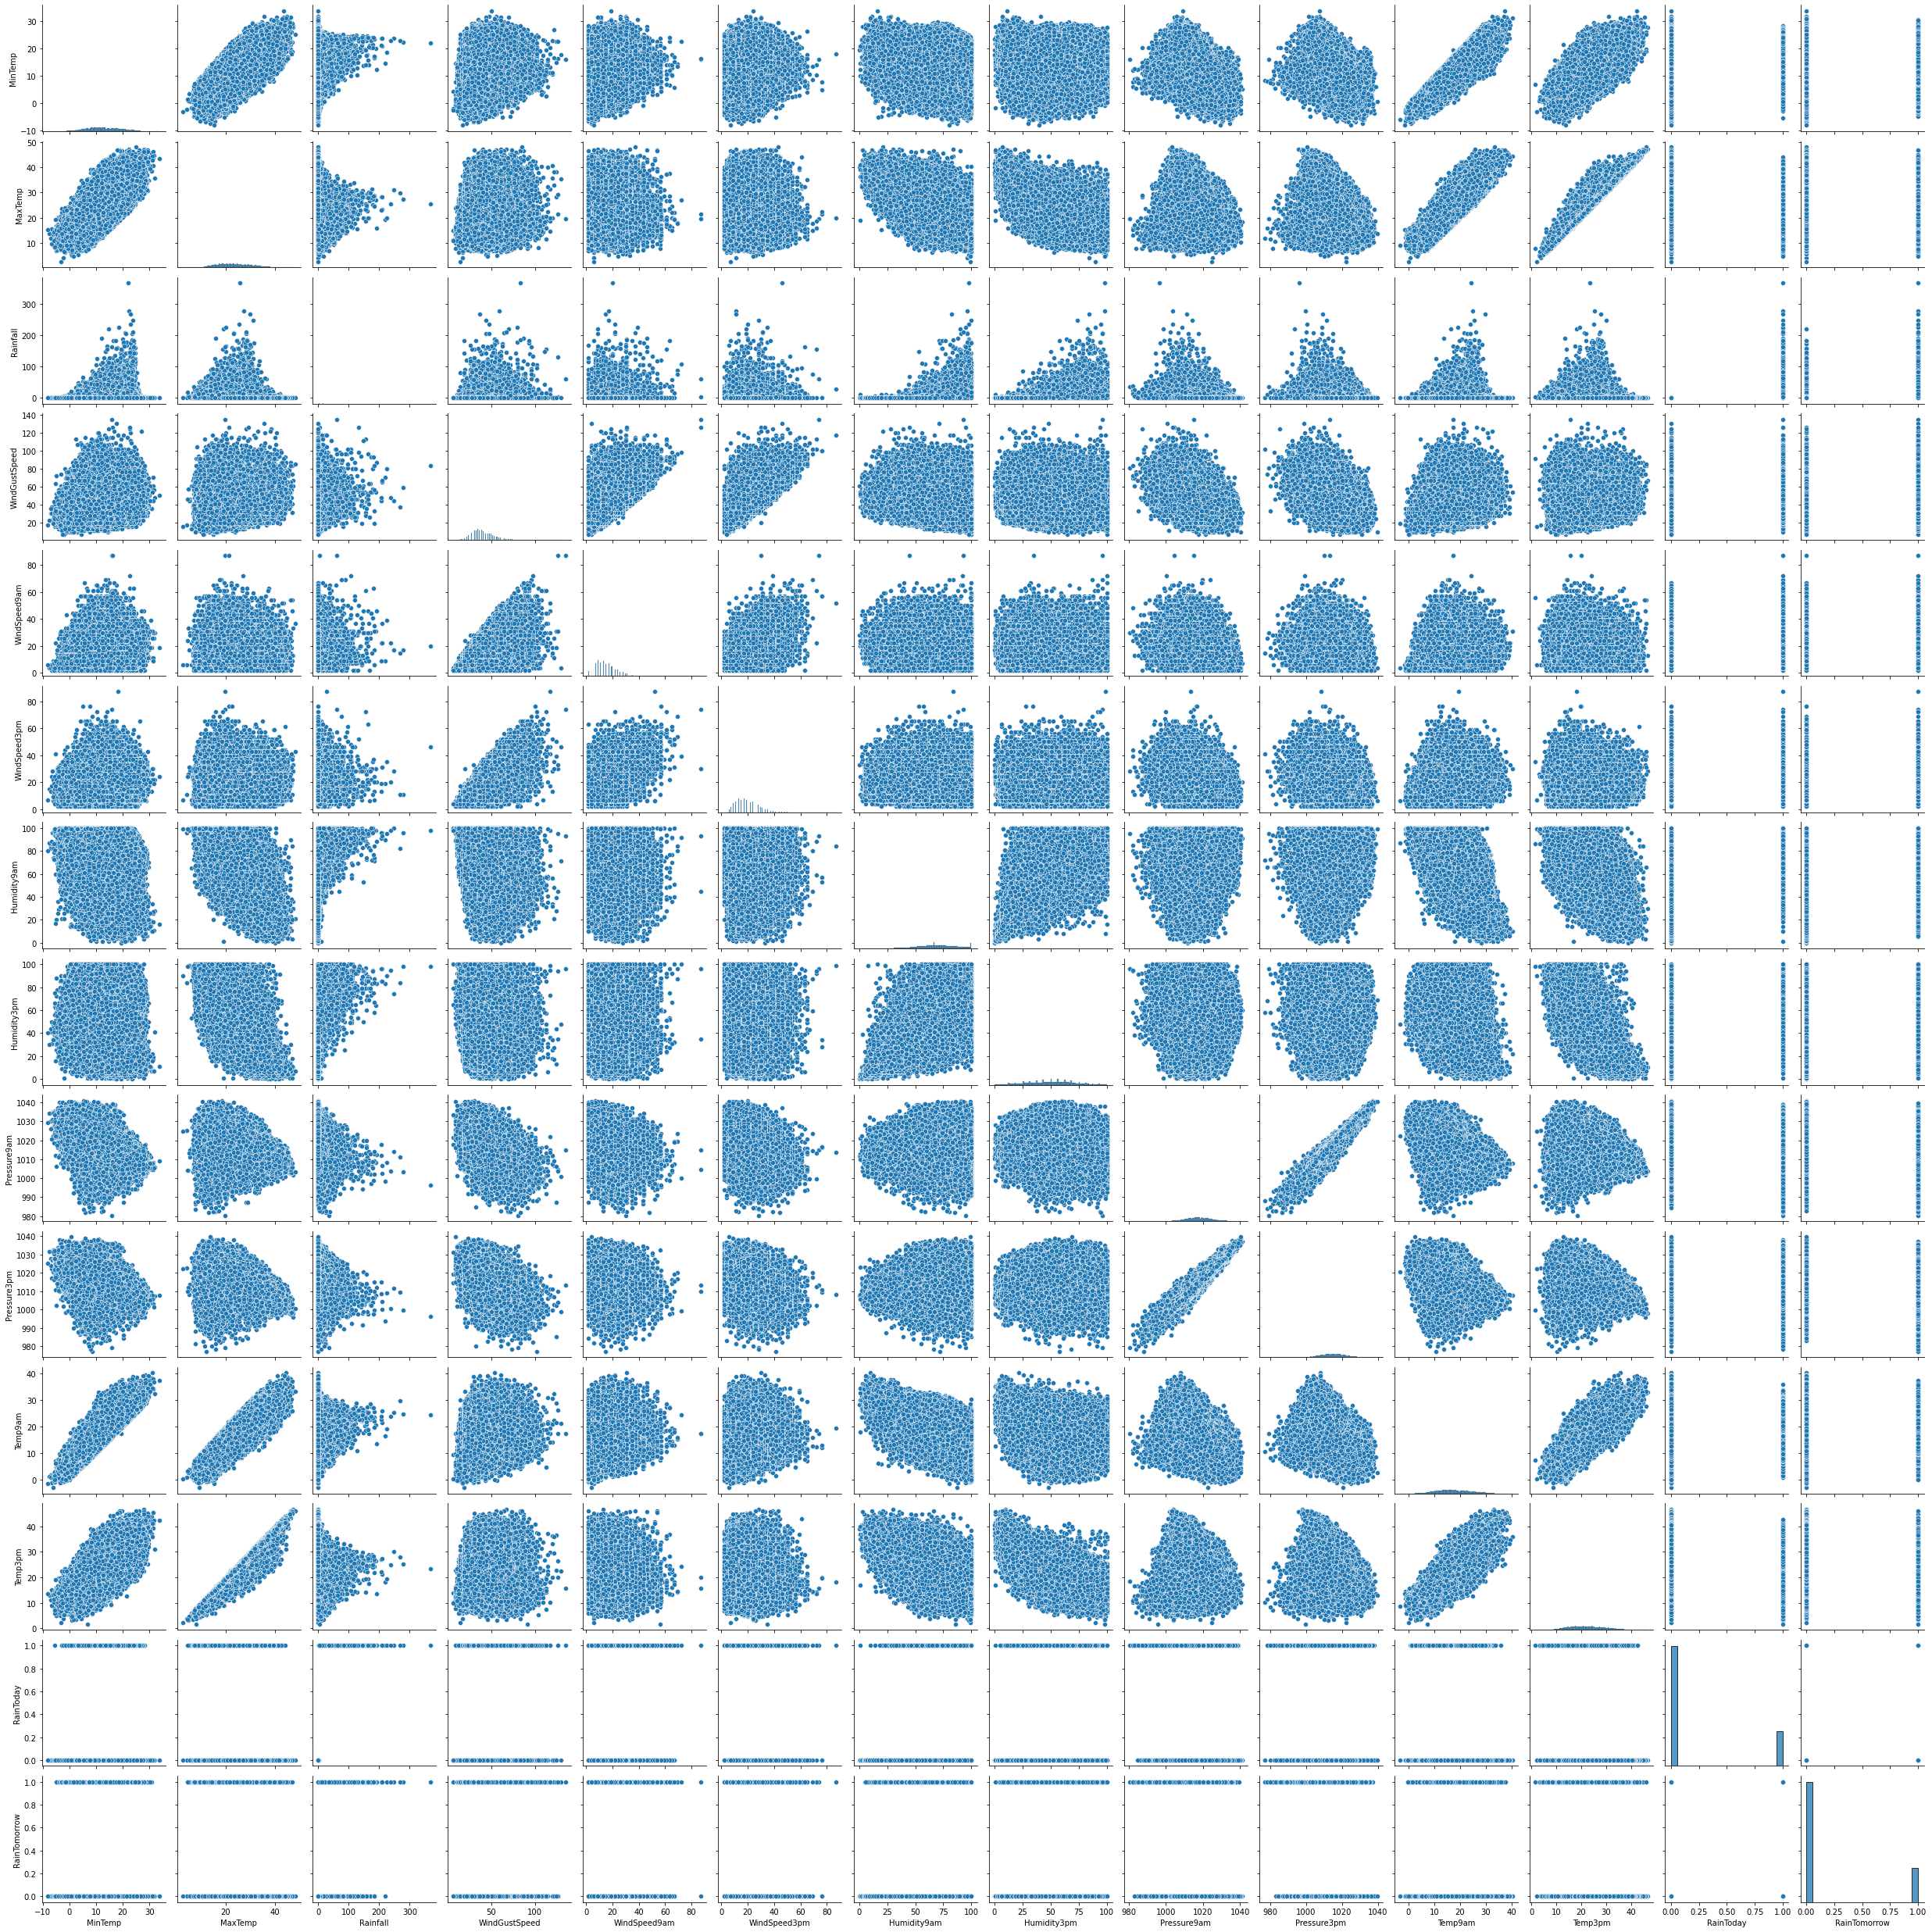

In [57]:
# Now we will perform some basic visualization to check how our numerical data is looking using seaborn's pairplot

sns.pairplot(rain_prediction_data)

In [48]:
# From the pairplot, we can see that some of the parameters are linearly correlated to each other.
# "Pressure9am" and "Pressure3pm" are more linearly dependent on each other from the plot than other parameters.
# ("Temp9am" and "temp3pm") and ("MinTemp" and "MaxTemp") are also linearly correlated to some extent.

In [58]:
# Now we are dropping the MinTemp, WindSpeed9am, WindSpeed3pm, Temp9am columns as they are not so correlated to output label

rain_prediction_data.drop(columns=["MinTemp","WindSpeed9am","WindSpeed3pm","Temp9am"],axis=1,inplace=True)

In [59]:
rain_prediction_data.head()

Date Location  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     22.9       0.6           W           44.0   
1  2008-12-02   Albury     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0          W        WNW         71.0         22.0       1007.7       1007.1   
1        NNW        WSW         44.0         25.0       1010.6       1007.8   
2          W        WSW         38.0         30.0       1007.6       1008.7   
3         SE          E         45.0         16.0       1017.6       1012.8   
4        ENE         NW         82.0         33.0       1010.8       1006.0   

   Temp3pm  RainToday  RainTomorrow  
0     21.8          0             0  
1     24.3          0             0  
2     23.2          0             0  
3     26.5          0             0  
4     29.7          0             0

In [60]:
rain_prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           112925 non-null  object 
 1   Location       112925 non-null  object 
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  object 
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  object 
 7   WindDir3pm     112925 non-null  object 
 8   Humidity9am    112925 non-null  float64
 9   Humidity3pm    112925 non-null  float64
 10  Pressure9am    112925 non-null  float64
 11  Pressure3pm    112925 non-null  float64
 12  Temp3pm        112925 non-null  float64
 13  RainToday      112925 non-null  int64  
 14  RainTomorrow   112925 non-null  int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 13.8+ MB


<AxesSubplot:xlabel='Humidity3pm'>

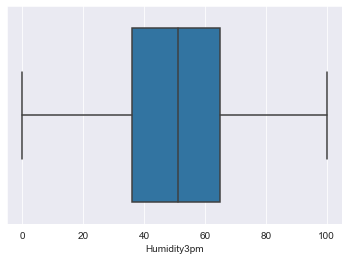

In [170]:
# Humidity is the most correlated parameter in the data with the RainTomorrow column

sns.boxplot(x = "Humidity3pm", data = rain_prediction_data)

In [63]:
# We are checking the data related to categorical columns

categorical_columns = list(filter(lambda x: rain_prediction_data[x].dtype == "object",rain_prediction_data.columns))
categorical_columns

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [64]:
# We can see that there are a total of 5 columns in our data with categorical values

In [67]:
# Out of the above 5 columns, we will convert the Date column as index for further analysis

rain_prediction_data.set_index("Date",inplace=True)

In [68]:
rain_prediction_data.head()

Location  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
Date                                                                           
2008-12-01   Albury     22.9       0.6           W           44.0          W   
2008-12-02   Albury     25.1       0.0         WNW           44.0        NNW   
2008-12-03   Albury     25.7       0.0         WSW           46.0          W   
2008-12-04   Albury     28.0       0.0          NE           24.0         SE   
2008-12-05   Albury     32.3       1.0           W           41.0        ENE   

           WindDir3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
Date                                                                        
2008-12-01        WNW         71.0         22.0       1007.7       1007.1   
2008-12-02        WSW         44.0         25.0       1010.6       1007.8   
2008-12-03        WSW         38.0         30.0       1007.6       1008.7   
2008-12-04          E         45.0         16.0       1017.6       1012.8   
2008-12-05         NW         82.0         33.0       1010.8       1006.0   

            Temp3pm  RainToday  RainTomorrow  
Date                                          
2008-12-01     21.8          0             0  
2008-12-02     24.3          0             0  
2008-12-03     23.2          0             0  
2008-12-04     26.5          0             0  
2008-12-05     29.7          0             0

In [69]:
# Now we will apply One-hot encoding to columns 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm' using get_dummies() method

rain_prediction_data = pd.get_dummies(data=rain_prediction_data, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],drop_first=True,)
rain_prediction_data.head()

MaxTemp  Rainfall  WindGustSpeed  Humidity9am  Humidity3pm  \
Date                                                                     
2008-12-01     22.9       0.6           44.0         71.0         22.0   
2008-12-02     25.1       0.0           44.0         44.0         25.0   
2008-12-03     25.7       0.0           46.0         38.0         30.0   
2008-12-04     28.0       0.0           24.0         45.0         16.0   
2008-12-05     32.3       1.0           41.0         82.0         33.0   

            Pressure9am  Pressure3pm  Temp3pm  RainToday  RainTomorrow  ...  \
Date                                                                    ...   
2008-12-01       1007.7       1007.1     21.8          0             0  ...   
2008-12-02       1010.6       1007.8     24.3          0             0  ...   
2008-12-03       1007.6       1008.7     23.2          0             0  ...   
2008-12-04       1017.6       1012.8     26.5          0             0  ...   
2008-12-05       1010.8       1006.0     29.7          0             0  ...   

            WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
Date                                                                     
2008-12-01               0              0             0              0   
2008-12-02               0              0             0              0   
2008-12-03               0              0             0              0   
2008-12-04               0              0             0              0   
2008-12-05               0              1             0              0   

            WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
Date                                                                      
2008-12-01               0               0              0             0   
2008-12-02               0               0              0             0   
2008-12-03               0               0              0             0   
2008-12-04               0               0              0             0   
2008-12-05               0               0              0             0   

            WindDir3pm_WNW  WindDir3pm_WSW  
Date                                        
2008-12-01               1               0  
2008-12-02               0               1  
2008-12-03               0               1  
2008-12-04               0               0  
2008-12-05               0               0  

[5 rows x 98 columns]

In [71]:
# Now we have a total of 98 columns and below are the columns names of the total columns

rain_prediction_data.columns

Index(['MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Richmond', 'Location_Sale', 'Location_Sydney',
       'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong',
   

# Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Defining the data into X and y for training

X = rain_prediction_data.drop("RainTomorrow",axis=1)
y = rain_prediction_data["RainTomorrow"]

In [75]:
# Now we are going to split the data into training and testing data for further analysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [76]:
X_train

MaxTemp  Rainfall  WindGustSpeed  Humidity9am  Humidity3pm  \
Date                                                                     
2013-10-03     22.5       0.0           43.0         46.0         23.0   
2016-03-04     23.1       0.0           28.0         64.0         56.0   
2016-10-06     29.1       0.0           19.0         29.0         25.0   
2009-04-04     17.0       1.4           56.0         63.0         42.0   
2011-01-18     24.2       0.0           35.0         60.0         47.0   
...             ...       ...            ...          ...          ...   
2011-09-08     14.7       0.0           35.0         31.0         86.0   
2010-10-03     29.8       0.0           48.0         62.0         61.0   
2014-10-23     28.3       0.0           30.0         74.0         29.0   
2015-05-03     19.4       0.0           22.0         99.0         44.0   
2014-11-06     20.0       0.0           35.0         66.0         52.0   

            Pressure9am  Pressure3pm  Temp3pm  RainToday  Location_Albury  \
Date                                                                        
2013-10-03       1026.4       1023.1     21.2          0                0   
2016-03-04       1019.4       1016.2     21.7          0                0   
2016-10-06       1022.5       1019.1     26.2          0                0   
2009-04-04       1015.9       1015.1     15.8          1                0   
2011-01-18       1010.7       1008.3     22.6          0                0   
...                 ...          ...      ...        ...              ...   
2011-09-08       1019.1       1017.4     10.2          0                0   
2010-10-03       1018.7       1015.1     28.8          0                0   
2014-10-23       1018.0       1014.1     27.5          0                0   
2015-05-03       1021.7       1017.7     18.3          0                0   
2014-11-06       1017.8       1014.5     18.4          0                0   

            ...  WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
Date        ...                                                               
2013-10-03  ...               0              0             0              0   
2016-03-04  ...               0              0             0              1   
2016-10-06  ...               0              0             0              0   
2009-04-04  ...               0              1             0              0   
2011-01-18  ...               0              0             0              0   
...         ...             ...            ...           ...            ...   
2011-09-08  ...               0              0             0              0   
2010-10-03  ...               0              0             0              0   
2014-10-23  ...               0              0             0              0   
2015-05-03  ...               0              0             0              0   
2014-11-06  ...               0              0             0              0   

            WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
Date                                                                      
2013-10-03               0               0              0             0   
2016-03-04               0               0              0             0   
2016-10-06               0               0              0             0   
2009-04-04               0               0              0             0   
2011-01-18               0               0              1             0   
...                    ...             ...            ...           ...   
2011-09-08               1               0              0             0   
2010-10-03               0               0              0             0   
2014-10-23               0               1              0             0   
2015-05-03               0               0              0             0   
2014-11-06               0               0              0             0   

            WindDir3pm_WNW  WindDir3pm_WSW 

In [77]:
y_train

Date
2013-10-03    0
2016-03-04    0
2016-10-06    0
2009-04-04    0
2011-01-18    0
             ..
2011-09-08    1
2010-10-03    0
2014-10-23    0
2015-05-03    0
2014-11-06    0
Name: RainTomorrow, Length: 79047, dtype: int64

In [78]:
X_test

MaxTemp  Rainfall  WindGustSpeed  Humidity9am  Humidity3pm  \
Date                                                                     
2016-11-21     42.1       0.0           57.0         21.0         10.0   
2014-08-20     14.6       0.2           33.0         69.0         59.0   
2012-03-25     32.2       2.8           35.0         67.0         39.0   
2014-08-23     22.0       0.0           30.0         57.0         44.0   
2016-06-22     19.7       0.0           50.0         60.0         34.0   
...             ...       ...            ...          ...          ...   
2009-01-16     22.8       0.0           26.0         63.0         61.0   
2013-12-16     27.1       0.0           31.0         78.0         53.0   
2014-10-22     26.1       0.2           46.0         85.0         57.0   
2015-11-15     31.8       2.0           44.0         63.0         62.0   
2013-12-12     24.0       2.4           39.0         58.0         35.0   

            Pressure9am  Pressure3pm  Temp3pm  RainToday  Location_Albury  \
Date                                                                        
2016-11-21       1005.2       1001.4     39.0          0                0   
2014-08-20       1026.1       1025.1     13.0          0                0   
2012-03-25       1010.8       1007.4     31.8          1                0   
2014-08-23       1024.6       1021.5     20.3          0                0   
2016-06-22       1004.8       1005.0     19.3          0                0   
...                 ...          ...      ...        ...              ...   
2009-01-16       1016.9       1016.2     21.6          0                0   
2013-12-16       1020.4       1018.3     26.2          0                0   
2014-10-22       1018.8       1010.2     26.0          0                0   
2015-11-15       1009.8       1005.7     29.9          1                0   
2013-12-12       1013.0       1010.8     22.1          1                0   

            ...  WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
Date        ...                                                               
2016-11-21  ...               0              0             0              0   
2014-08-20  ...               0              0             0              1   
2012-03-25  ...               0              0             0              0   
2014-08-23  ...               0              0             0              0   
2016-06-22  ...               0              0             0              0   
...         ...             ...            ...           ...            ...   
2009-01-16  ...               0              0             0              0   
2013-12-16  ...               0              0             0              0   
2014-10-22  ...               0              0             0              0   
2015-11-15  ...               0              0             0              0   
2013-12-12  ...               0              0             0              0   

            WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
Date                                                                      
2016-11-21               0               0              1             0   
2014-08-20               0               0              0             0   
2012-03-25               0               0              0             0   
2014-08-23               0               0              0             0   
2016-06-22               0               0              0             1   
...                    ...             ...            ...           ...   
2009-01-16               1               0              0             0   
2013-12-16               0               0              0             0   
2014-10-22               0               0              0             0   
2015-11-15               0               0              0             0   
2013-12-12               0               0              0             0   

            WindDir3pm_WNW  WindDir3pm_WSW 

In [79]:
y_test

Date
2016-11-21    0
2014-08-20    0
2012-03-25    0
2014-08-23    0
2016-06-22    0
             ..
2009-01-16    0
2013-12-16    0
2014-10-22    1
2015-11-15    0
2013-12-12    0
Name: RainTomorrow, Length: 33878, dtype: int64

In [80]:
# Now we will apply Standard Scaling operations to our data

scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[ 2.63847567e+00, -2.75553535e-01,  1.22055878e+00, ...,
        -2.78506511e-01, -2.55640697e-01, -2.70000493e-01],
       [-1.29697282e+00, -2.52312008e-01, -5.84003239e-01, ...,
        -2.78506511e-01, -2.55640697e-01, -2.70000493e-01],
       [ 1.22171421e+00,  4.98278442e-02, -4.33623071e-01, ...,
        -2.78506511e-01, -2.55640697e-01, -2.70000493e-01],
       ...,
       [ 3.48760185e-01, -2.52312008e-01,  3.93467854e-01, ...,
        -2.78506511e-01, -2.55640697e-01, -2.70000493e-01],
       [ 1.16447133e+00, -4.31382642e-02,  2.43087686e-01, ...,
        -2.78506511e-01, -2.55640697e-01, -2.70000493e-01],
       [ 4.82350276e-02,  3.34478996e-03, -1.32862734e-01, ...,
        -2.78506511e-01, -2.55640697e-01,  3.70369695e+00]])

# Model Building and Evaluation

### Decision Tree Classifier

In [171]:
# Importing the Decision Tree Classifier to build our model

from sklearn.tree import DecisionTreeClassifier

In [82]:
# Creating the model object and assigning the model to the object

dt_classifier = DecisionTreeClassifier()

In [83]:
# Fitting the training data into our model

dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [86]:
# Predicting the model outputs using the test data

dt_predictions = dt_classifier.predict(X_test)

In [85]:
# Importing the necessary metrics for evaluating the predicted outputs 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [90]:
# Verifying the outputs using the Confusion Matrix

print(confusion_matrix(dt_predictions,y_test))

[[22839  3518]
 [ 3463  4058]]


In [89]:
# Checking the Precesion, Recall and F1-score using the Classification Report

print(classification_report(dt_predictions,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     26357
           1       0.54      0.54      0.54      7521

    accuracy                           0.79     33878
   macro avg       0.70      0.70      0.70     33878
weighted avg       0.79      0.79      0.79     33878



In [91]:
# We are getting nearly 79% of accuracy with our model using Decision Tree Classifier 

accuracy_score(dt_predictions,y_test).round(2)

0.7939370683039141

### Random Forest Classifier

In [93]:
# Importing the RandormForestClassifier from the sklearn's ensemble module

from sklearn.ensemble import RandomForestClassifier

In [94]:
# Initializing our model to an object as shown below

rf_classifier = RandomForestClassifier()

In [95]:
# Now we are training the model with the training data

rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
# We are using the test data for predicting the 

rf_predictions = rf_classifier.predict(X_test)

In [97]:
# Verifying the outputs using the Confusion Matrix

print(confusion_matrix(rf_predictions,y_test))

[[25244  3785]
 [ 1058  3791]]


In [98]:
# Checking the Precesion, Recall and F1-score using the Classification Report

print(classification_report(rf_predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     29029
           1       0.50      0.78      0.61      4849

    accuracy                           0.86     33878
   macro avg       0.73      0.83      0.76     33878
weighted avg       0.89      0.86      0.87     33878



In [100]:
# We are getting nearly 86% of accuracy with our model using Random Forest Classifier

accuracy_score(rf_predictions,y_test).round(2)

0.8570458704764153

In [103]:
# Our Random Forest model worked on the below parameters to obtain 86% of accuracy score

rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyper-Parameter Tuning

In [108]:
# We are now importing and using GridSearchCV from the sklearn for the process of tuning our paramaters for better accuracy

from sklearn.model_selection import GridSearchCV

# Defining various parameters in the grid of parameters based on the above best paramaters from Random Forest classifier

grid_parameters = {'n_estimators': [100, 200], 'max_depth' : [4,5,8,10], 'criterion' : ['gini', 'entropy']}

In [109]:
# We are applying the grid paramaters to the GridSearchCV algorithm and fitting the training data into our model

grid_rf = GridSearchCV(estimator=rf_classifier, param_grid = grid_parameters)
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 8, 10],
                         'n_estimators': [100, 200]})

In [110]:
# These are the best parameters that we got for our model after applying the grid search

grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

In [111]:
# Predicting the output of the model after applying grid parameters

grid_rf_predictions = grid_rf.predict(X_test)

In [112]:
# Verifying the outputs using the Confusion Matrix

print(confusion_matrix(grid_rf_predictions,y_test))  

[[25649  4667]
 [  653  2909]]


In [113]:
# Checking the Precesion, Recall and F1-score using the Classification Report

print(classification_report(grid_rf_predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     30316
           1       0.38      0.82      0.52      3562

    accuracy                           0.84     33878
   macro avg       0.68      0.83      0.71     33878
weighted avg       0.91      0.84      0.87     33878



In [114]:
# We are still getting nearly 85% of accuracy with our model after tuning the parameters

accuracy_score(grid_rf_predictions,y_test)

0.842965936596021

In [115]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200)

<AxesSubplot:>

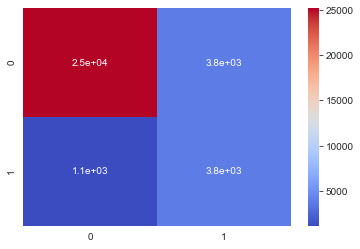

In [174]:
# We can still see that some parameters like 'criterion': 'gini' and n_estimators are more or less the same 
# They are the best parameters compared to their other counterparts like "entropy" and other n_estimators
# So, we are only applying different values of max_depth parameter to our model and verifuying the results 

grid_parameters = {'max_depth' : [20,25,30,35]}
grid_rf = GridSearchCV(estimator=rf_classifier, param_grid = grid_parameters)
grid_rf.fit(X_train, y_train)
grid_rf_predictions = grid_rf.predict(X_test)
con_matrix = confusion_matrix(grid_rf_predictions,y_test)
sns.heatmap(con_matrix,annot=True,cmap="coolwarm")

In [122]:
# Checking the Precesion, Recall and F1-score using the Classification Report

print(classification_report(grid_rf_predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     28937
           1       0.51      0.78      0.61      4941

    accuracy                           0.86     33878
   macro avg       0.73      0.82      0.76     33878
weighted avg       0.89      0.86      0.87     33878



In [123]:
# We are able to increase the accuracy to some extent but are still getting only 86% of accuracy with our model 

accuracy_score(grid_rf_predictions,y_test).round(2)

0.8575181533738709

In [141]:
# Now we are creating a function for returning the accuracy scores of our model with various values of max_depth parameter
# We are taking the values with range of (4,20,2), that is values ranging from 4 to 18 with a step size of 2

def model_accuracy():
    values = []
    for i in range(4,20,2):
        grid_rf = GridSearchCV(estimator=rf_classifier, param_grid = {'max_depth' : [i]})
        grid_rf.fit(X_train, y_train)
        grid_rf_predictions = grid_rf.predict(X_test)
        values.append(accuracy_score(grid_rf_predictions,y_test).round(2))
    return values

In [145]:
acc_scores = model_accuracy()

In [146]:
# We got the accuracy scores for different max_depth values

acc_scores

[0.8, 0.83, 0.84, 0.84, 0.85, 0.85, 0.85, 0.85]

([<matplotlib.axis.XTick at 0x222b7d50c10>,
 [Text(0, 0, '4'),
  Text(1, 0, '6'),
  Text(2, 0, '8'),
  Text(3, 0, '10'),
  Text(4, 0, '12'),
  Text(5, 0, '14'),
  Text(6, 0, '16'),
  Text(7, 0, '18')])

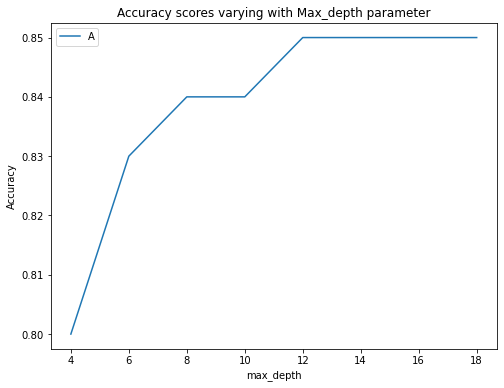

In [152]:
# We are plotting the figure with the varying values of accuracy scores with max_depth parameter

plt.figure(figsize=(8,6))
plt.plot(acc_scores)
plt.legend("Accuracy Score")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy scores varying with Max_depth parameter")
plt.xticks([0,1,2,3,4,5,6,7], list(range(4,20,2)))

In [ ]:
# We can see from the above graph that the accuracy is stable after having the max_depth parameter as 12 and so on. We are getting 85-86 % of accuracy for our model using the Random Forest Classifier.

# Conclusions

## Firstly, we can clearly see that Random Forest Classifier(86% Accuracy) is performing much better than the Decison Tree Classifier(79% Accuracy). In addition to that, we can also see that using the hyperparameter tuning, our model is stable and is clearly getting accuracy of 85-86% with vaious parameters. The final accuracy of our model is 85.7% which is nearly 86%. This is very good accuracy, but our model needs to be improved in terms of predicting the rainfall. It is performing very good in terms of predicting that there is going to be no Rain tomorrow with an F1-Score of 91% but in the instances of Rain tomorrow our model is not reaching expectations with F1-Score of only 61%. In conclusion, overall our model is performing very well with an accuracy of 86% but needs to improve in predicting the possible Raining instances.